# Graphiques de corrélation

In [6]:
# Getting the dataset
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv(r"DS_CentraleSupelec_ST42021/DS_CentraleSupelec_train.csv")

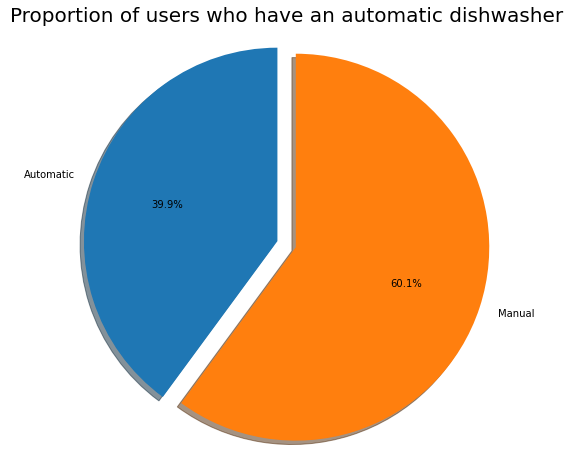

In [7]:
labels = 'Automatic', 'Manual'
sizes = [df.washDishes[df['washDishes']=='Auto'].count(), df.washDishes[df['washDishes']=='Hand'].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of users who have an automatic dishwasher", size = 20)
plt.show()